<span style="font-size: 250%; font-weight: bold">Simulating Stochastic Processes</span>

# Table of Contents
* [1. Introduction](#1.-Introduction)
* [2. Simulating Brownian Motion](#2.-Simulating-Brownian-Motion)
	* [2.1 With a `for` loop](#2.1-With-a-for-loop)
	* [2.2 Without a `for` loop](#2.2-Without-a-for-loop)
* [3. Simple processes](#3.-Simple-processes)



# 1. Introduction

In this notebook we will review various methods for simulating stochastic processes. 

We begin by recalling Brownian Motion. This is a stochastic process $\{B_t\}_{t\ge 0}$ such that:

* $B_0=0$;
* For $s<t$, $B_t-B_s$ is independent of $\sigma(B_u: u\leq s)=\mathcal{F}_s$;
* For $s<t$, $B_t-B_s\sim N(0,t-s)$;
* Almost surely $t\mapsto B_t$ is a continuous function on $[0,\infty)$.

# 2. Simulating Brownian Motion

## 2.1 With a `for` loop

Fix a small increment $\Delta t>0$. Then:
$$
B(t+\Delta t)-B(t)\sim N(0,\Delta t)\sim \sqrt{\Delta t}\cdot N(0,1).
$$

In [5]:
%matplotlib inline
import numpy as np
from random import gauss
import matplotlib.pyplot as plt

# random seed (try changing this value and see what happens)
seed = 4889182

# set up the PRNGs
import random as rnd
import numpy.random as nrnd
rnd.seed(seed)
nrnd.seed(seed)


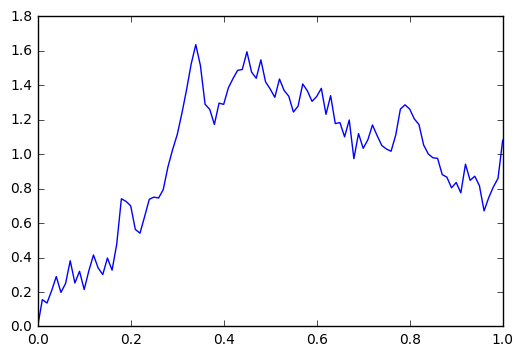

In [6]:
# Naive algorithm to simulate Brownian Motion

# seed the PRNGs
rnd.seed(seed)
nrnd.seed(seed)

# number of steps
N = 100

# length of the interval [0,T]
T = 1.0

# time increments
Delta = T/N

# times
t = np.linspace(0,T,N+1)

# initialize the vector B
B1 = [0]

# the for loop
for i in range(N):
    B1.append(B1[-1] + ( np.random.normal(0, 1) )*np.sqrt(Delta) )

# plot the function
plt.plot(t,B1)

None

## 2.2 Without a `for` loop

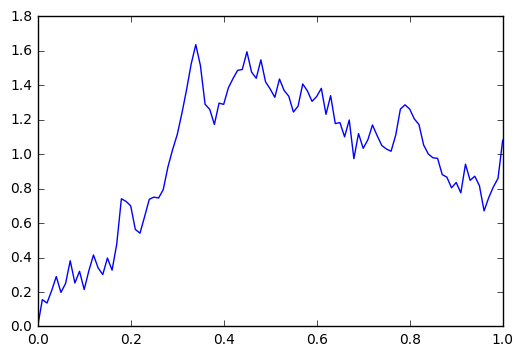

In [7]:
# seed the PRNGs as before
rnd.seed(seed)
nrnd.seed(seed)

# in one line
B2 = np.cumsum( np.insert( ( np.random.normal(0, 1, N) )*np.sqrt(Delta), 0, 0 ) ) 

# plot the function
plt.plot(t,B2)

None

# 3. Simple processes

A simple process $\{A_t\}_{\ge 0}$ is constructed by fixing times $0=t_0<t_1<\cdots<t_n<\infty=t_{n+1}$, and fixing random variables $Y_j$, for $j=0,\dots,n$, then letting
$$
A_t = Y_j\qquad \text{for $t_j\le t<t_{j+1}$.}
$$
Below we compute an example for which $t_j=\frac{j}{5}$, for $j=0,\dots,5$, and $Y_j$ are independent uniform random variables in $[0,10]$. 

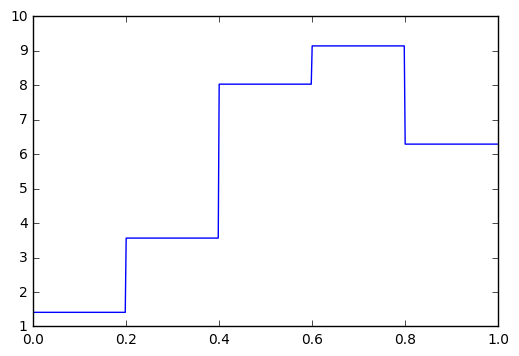

In [8]:
M = 5
N = 100

# length of the interval [0,T]
T = 1.0

# time increments
Delta = T/(N*M)

# times
t = np.linspace(0,T,N*M+1)

# initialize the vector A
a1 = []

for i in range(M):
    
    a1.append( [nrnd.uniform(0,10)]*N )
    
A1 = [item for sublist in a1 for item in sublist]

plt.plot(t[:-1],A1)
    
None

Given the simple process $\{A_t\}_{\ge 0}$, with fixed times $0=t_0<t_1<\cdots<t_n<\infty=t_{n+1}$, and fixed random variables $Y_j$, for $j=0,\dots,n$, as above, the stochastic integral
$$
Z_t=\int A_s dB_s
$$
is defined as follow:
$$
Z_0=0\qquad\text{and}\qquad Z_t = Z_{t_j} + Y_j(B_t-B_{t_j})\qquad \text{for $t_j\le t\le t_{j+1}$.}
$$
Below we use the Markov property of Brownian motion to compute the stochastic integral of $A_t$ obtained in the example above. 

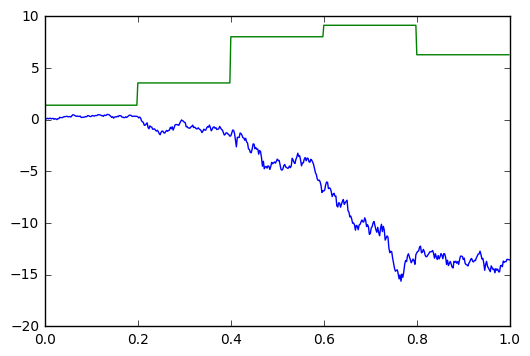

In [9]:
# initialize the vector Z
z1 = []

for i in range(M):
    z1.append( list( ( np.random.normal(0,1,N) * np.sqrt(Delta) ) * A1[i*N] ) )
    
flat_Z1 = [item for sublist in z1 for item in sublist]

Z1 = np.cumsum(np.insert( flat_Z1, 0, 0 ) )

plt.plot(t,Z1)
plt.plot(t[:-1],A1)

None

Notice how $Z_t$ is spikier (larger variance) on the intervals where $A_s$ (i.e. $Y_j$) is larger.

# 4. Quadratic variation

Given a process $\{Z_t\}_{t\ge 0}$ its _quadratic variation_ is defined as
$$
\langle Z\rangle_t:=\lim_{n\rightarrow\infty}\sum_{j\le nt}\left[ Z\left(\frac{j}{n}\right)-Z\left(\frac{j-1}{n}\right)\right]^2\tag{1}
$$
For stochastic integrals
$$
Z_t = \int_0^t A_s dB_s,
$$
it is a fact that
$$
\langle Z\rangle_t=\int_0^t A_s^2 ds.\tag{2}
$$

<div style="background-color: #ff6600; padding: 10px; color: white; font-size: 120%; font-weight: bold; margin-top: 0.5cm">Exercise</div>

Verify $(2)$ numerically when $A_t$ is the simple process generated above.

1. First, find a closed formula for the right hand-side of (2) and compute it using `A1` above.
1. Second, compute (1) using $n=$ `Delta` as defined in the code above, namely using `flat_Z1` above.


<div style="background-color: #0000ff; padding: 10px; color: white; font-size: 120%; font-weight: bold; margin-top: 0.5cm">Solution</div>

First note that, in this case
$$
\int_0^t A_s^2 ds=\frac{1}{M}\sum_{j=0}^{M-1} Y_j^2
$$

In [10]:
### (1)
z2 = []
for i in range(M):
    z2.append( A1[i*N]* A1[i*N] ) 
s=np.sum(z2)/M

40.4954901148


In [16]:
### (2)
Z=np.power(flat_Z1,2)
s=np.sum(Z)
print(s)

38.6578810265
